In [218]:
import pandas as pd

In [219]:
#read data in; data is already sep into test and train
titanic_train = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [220]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [221]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [222]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [223]:
#drop obvious unwanted features
unwanted_features = ['Name', 'Cabin', 'Ticket', 'Age']
titanic_train = titanic_train.drop(unwanted_features, axis=1)
titanic_test = titanic_test.drop(unwanted_features, axis=1)

In [225]:
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,0,7.2500,S
1,2,1,1,female,1,0,71.2833,C
2,3,1,3,female,0,0,7.9250,S
3,4,1,1,female,1,0,53.1000,S
4,5,0,3,male,0,0,8.0500,S


In [226]:
#handle nonnumeric values
from sklearn import preprocessing

In [227]:
le = preprocessing.LabelEncoder()

In [228]:
#label encode gender
titanic_train['Sex'] = le.fit_transform(titanic_train['Sex']) 
titanic_test['Sex'] = le.fit_transform(titanic_test['Sex']) 

In [229]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 55.8+ KB


In [230]:
#one hot encode embarked
titanic_train = pd.get_dummies(titanic_train, columns=['Embarked'], dtype=int)
titanic_test = pd.get_dummies(titanic_test, columns=['Embarked'], dtype=int)
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,1,0,7.2500,0,0,1
1,2,1,1,0,1,0,71.2833,1,0,0
2,3,1,3,0,0,0,7.9250,0,0,1
3,4,1,1,0,1,0,53.1000,0,0,1
4,5,0,3,1,0,0,8.0500,0,0,1


In [234]:
titanic_train=titanic_train.dropna()
titanic_test['Fare'].fillna(titanic_test['Fare'].mean(), inplace=True)

In [237]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked_C   891 non-null    int64  
 8   Embarked_Q   891 non-null    int64  
 9   Embarked_S   891 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 69.7 KB


In [238]:
import seaborn as sns

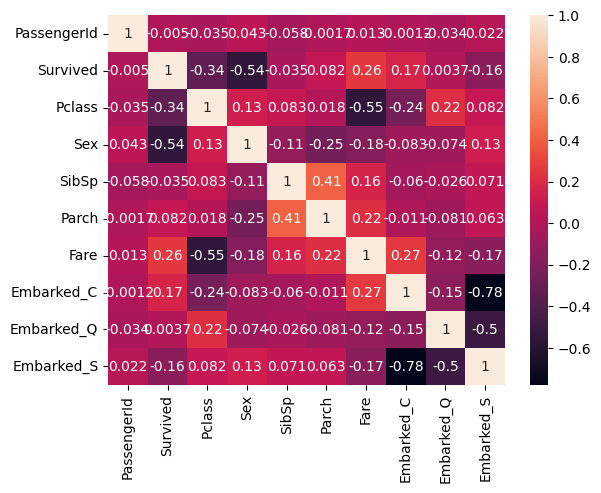

In [239]:
#see data correlations
heatmap = sns.heatmap(titanic_train.corr(), annot=True)

In [240]:
#separate target column from data
titanic_train_y = titanic_train[["Survived"]]

titanic_train_x = titanic_train.drop(["Survived"], axis=1)

In [241]:
#start NN implementation
import torch
import numpy as np

In [242]:
#convert to tensors
xtrain = torch.from_numpy(titanic_train_x.values).float()
xtest = torch.from_numpy(titanic_test.values).float()

In [243]:
xtrain.shape

torch.Size([891, 9])

In [244]:
#reshape y to match format for loss function
ytrain = torch.from_numpy(titanic_train_y.values).view(1,-1)[0]

In [245]:
ytrain.shape

torch.Size([891])

In [246]:
import torch.nn as nn
import torch.nn.functional as F

In [247]:
#set our constants
input_size = 9 #num features
output_size = 2 #survived or not
hidden_size = 40

In [248]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        
        return F.log_softmax(x, dim=-1)

In [249]:
#instantiate model
model = Net()

In [250]:
#set up optimizer
import torch.optim as optim

In [251]:
optimizer = optim.Adam(model.parameters())
loss_fn = nn.NLLLoss()

In [252]:
epoch_data = []
epochs = 1001

In [253]:
for epoch in range(1, epochs):
    optimizer.zero_grad() #zero out gradients
    ypred = model(xtrain) #forward pass to calc predictions
    
    loss = loss_fn(ypred, ytrain) #calc loss
    loss.backward() #back prop to calc grad
    
    optimizer.step() #update grad
    
    ypred_test = model(xtest)
    
    _,pred = ypred_test.data.max(1)

In [254]:
len(xtest)

418

In [255]:
len(pred)

418

In [256]:
output = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived': pred})
output.to_csv('submission.csv', index=False)